In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
#import warnings
#warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("/content/Language Detection.csv")

In [3]:
X = df["Text"]
y = df["Language"]

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
#creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

<ipython-input-5-076a6ed2470c>:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [6]:
# creation of feature extractor for text data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray() # to learn the vocabulary dictionary and extract the term frequency matrix
print(X.shape)

(10337, 34937)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
# multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [9]:
y_pred = model.predict(x_test) #predicting the model with x_test data

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        92
           1       0.98      0.95      0.96        83
           2       0.99      0.97      0.98        95
           3       0.94      1.00      0.97       270
           4       0.98      0.99      0.98       206
           5       1.00      0.99      1.00       110
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        11
           8       1.00      0.96      0.98       158
           9       1.00      0.97      0.99        77
          10       0.99      0.99      0.99       131
          11       1.00      0.99      0.99       143
          12       1.00      0.97      0.99       146
          13       0.93      0.99      0.96       141
          14       0.99      0.97      0.98       148
          15       1.00      1.00      1.00        94
          16       1.00      0.96      0.98        95

    accuracy              

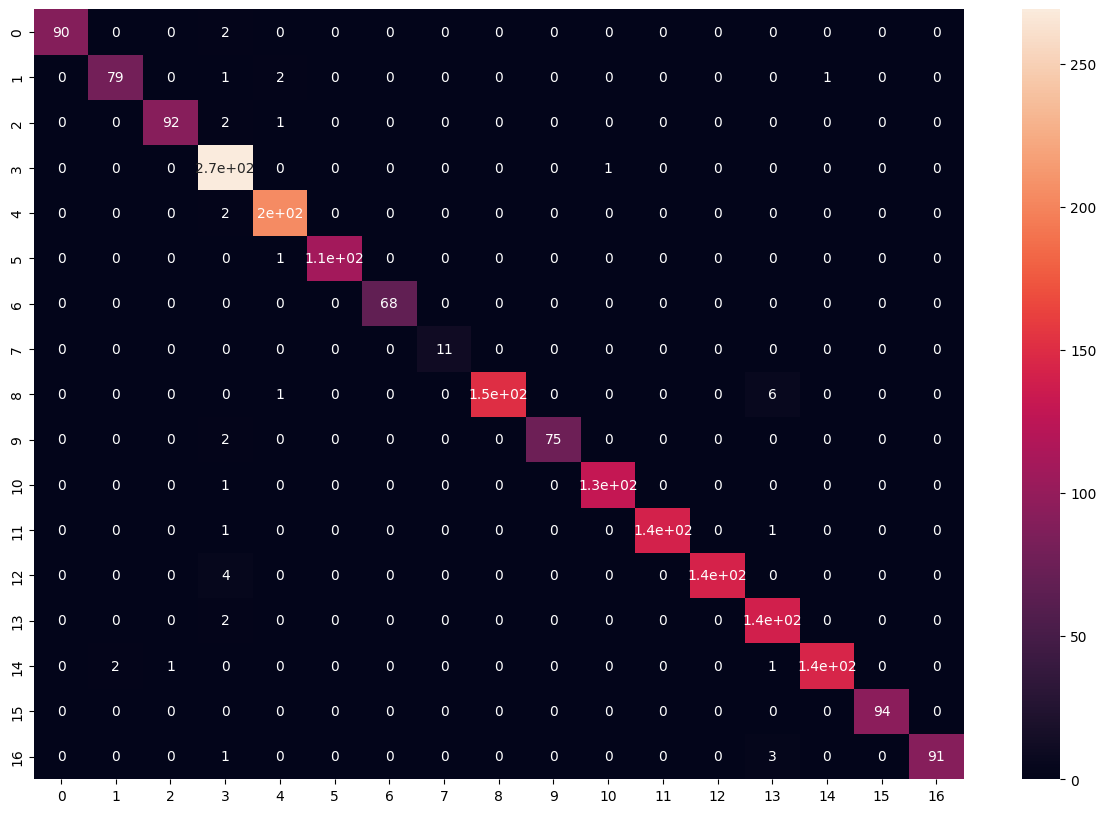

In [14]:
#heat map
plt.figure(figsize=(15,10))
sns.heatmap(conf_matrix, annot = True)
plt.show()

In [15]:
def predict_lang(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("Language : ",lang[0]) # printing the language

In [16]:
df["Language"].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [17]:
# Malayalam
predict_lang("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

Language :  Malayalam


In [18]:
predict_lang("வணக்கம்") #tamil

Language :  Tamil


In [19]:
predict_lang("je t'aime") #French

Language :  French


In [20]:
predict_lang("ich vermisse diche") #german

Language :  German


In [21]:
predict_lang("مرحبا.. كيف حالك؟")

Language :  Arabic


In [22]:
predict_lang("io ho molto fame!")

Language :  Italian


In [23]:
predict_lang("گزشتہ ایک روز کے دوران کورونا کے سبب 118 اموات ہوئیں جس کے بعد اموات کا مجموعہ")

Language :  Arabic
